In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Height-Weight Data.csv')

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape

(3501, 2)

Text(0.5, 1.0, 'mesurement of height and weight')

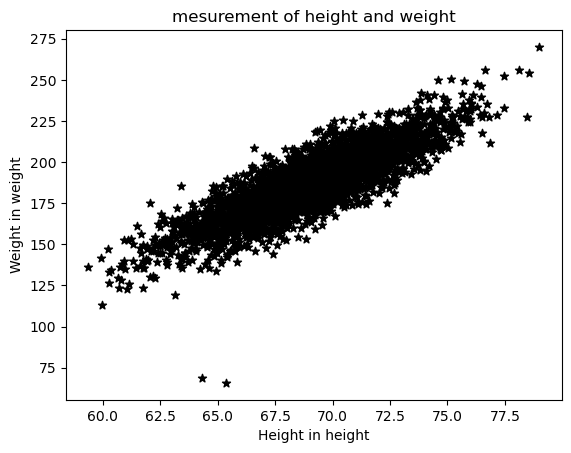

In [5]:
plt.scatter(df.Height , df.Weight, color='black', marker='*')
plt.xlabel('Height in height')
plt.ylabel('Weight in weight')
plt.title('mesurement of height and weight')

In [6]:
x = df.drop('Weight', axis=1)
y = df[['Weight']]

In [7]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [8]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
y.shape

(3501, 1)

In [10]:
x.mean()

Height    69.024411
dtype: float64

In [11]:
y.mean()

Weight    186.891258
dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test = train_test_split(df, test_size=.30) #testing data=25%

In [14]:
train.shape 

(2450, 2)

In [15]:
test.shape

(1051, 2)

In [16]:
train.head()

,Height,Weight
3208,72.038944,181.290484
1482,68.610922,181.230543
1586,66.276138,174.209764
1028,66.871878,170.323958
1330,69.566693,194.984263


# Seperate

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25, random_state=2) #testing data=25%

In [18]:
xtrain.head()

,Height
358,66.762110
2767,67.766513
1466,66.351541
1846,69.800360
1416,69.550376


In [19]:
ytrain.head()

,Weight
358,167.700496
2767,172.669566
1466,171.963792
1846,184.292066
1416,199.807846


# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr =  LinearRegression()

In [22]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [23]:
m = lr.coef_
m

array([[5.92559235]])

In [24]:
c = lr.intercept_
c

array([-222.20252173])

In [25]:
yp = (m*63)+c
yp

array([[151.10979654]])

In [26]:
yp = (m*69)+c
yp

array([[186.66335066]])

In [27]:
lr.predict([[69]])

array([[186.66335066]])

In [28]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [29]:
df['predicted_Weight'] = lr.predict(x)
df.head()

,Height,Weight,predicted_Weight
0,73.847017,241.893563,215.384798
1,68.781904,162.310473,185.371003
2,74.110105,212.740856,216.943752
3,71.730978,220.042470,202.846015
4,69.881796,206.349801,191.888513


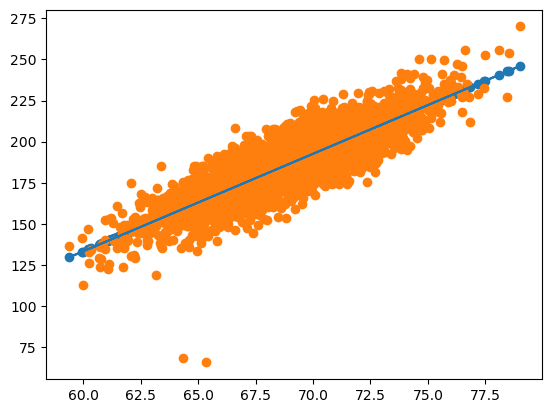

In [30]:
plt.plot(x, df[['predicted_Weight']])      # plt.plot(x.squeeze(), df[['predicted_rent']])
plt.scatter(x, df[['predicted_Weight']])
plt.scatter(x, df[['Weight']])

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
mse = mean_squared_error(ytest, lr.predict(xtest))
mae = mean_absolute_error(ytest, lr.predict(xtest))

In [33]:
mae

8.068510655070494

In [34]:
mse

102.70710532291169

In [35]:
lr.score(xtest, ytest)

0.7423110667653378

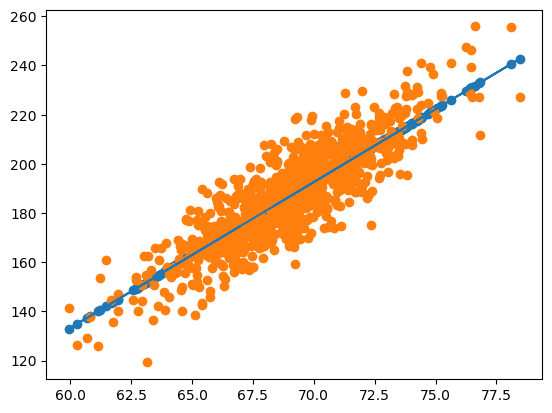

In [36]:
plt.plot(xtest, lr.predict(xtest))     
plt.scatter(xtest, lr.predict(xtest))
plt.scatter(xtest, ytest)